In [1]:
import pandas as pd
import json
import requests
from pandas import json_normalize
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import date
from IPython.display import display, Markdown
%matplotlib inline

In [2]:
# Load page 1 of data and initialize the dataframes.
jsonObj = json.loads(requests.get('https://api.osf.io/v2/institutions/uwstout/users/?format=json').text)
metadf = pd.json_normalize(jsonObj["links"])
df = pd.json_normalize(jsonObj["data"])

jsonObj = json.loads(requests.get('https://api.osf.io/v2/institutions/uwstout/nodes/?format=json').text)
metadf1 = pd.json_normalize(jsonObj["links"])
df1 = pd.json_normalize(jsonObj["data"])

In [3]:
# Check for additional pages and append to dataframe.
while metadf['next'].item() != None:
    jsonObj = json.loads(requests.get(metadf['next'].item()).text)
    metadf = pd.json_normalize(jsonObj["links"])
    df2 = pd.json_normalize(jsonObj["data"])
    df = pd.concat([df, df2], join="inner")

while metadf1['next'].item() != None:
    jsonObj = json.loads(requests.get(metadf1['next'].item()).text)
    metadf1 = pd.json_normalize(jsonObj["links"])
    df2 = pd.json_normalize(jsonObj["data"])
    df1 = pd.concat([df1, df2], join="inner")

In [4]:
# Sort data by registration date and add count column.
df['attributes.date_registered'] = pd.to_datetime(df['attributes.date_registered'])
df = df.sort_values(by=['attributes.date_registered'], ascending=True)
df.set_index('attributes.date_registered',inplace=True)
df['count'] = range(1,len(df) + 1)
countusers = df['count'][-1]

df1['attributes.date_created'] = pd.to_datetime(df1['attributes.date_created'])
df1 = df1.sort_values(by=['attributes.date_created'], ascending=True)
df1.set_index('attributes.date_created',inplace=True)
df1['count'] = range(1,len(df1) + 1)
countnodes = df1['count'][-1]
today = date.today()

In [5]:
display(Markdown('# As of ' + today.strftime("%B %d, %Y") + ' there are <span style=\"color:red\">'+ str(countusers) + '</span> Open@Stout users and <span style=\"color:red\">'+ str(countnodes) + '</span> public projects!'))

# As of July 02, 2022 there are <span style="color:red">32</span> Open@Stout users and <span style="color:red">32</span> public projects!

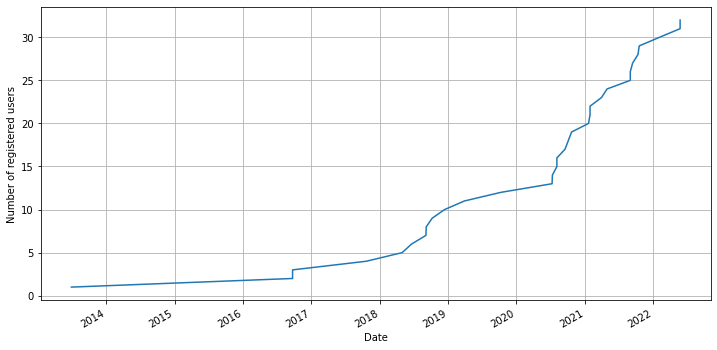

In [6]:
outplot = df.plot(y='count', legend=False, grid='True', figsize=(12,6));
outplot.set_ylabel("Number of registered users");
outplot.set_xlabel("Date");

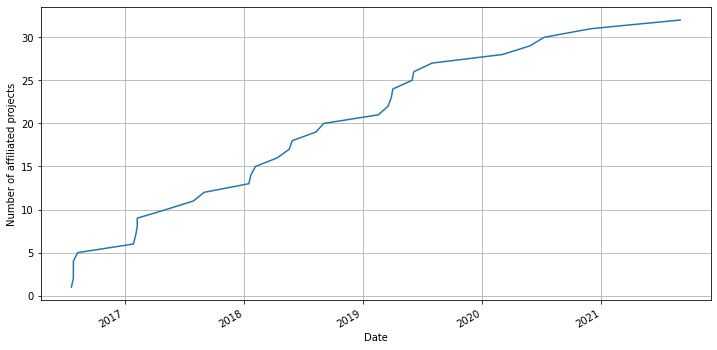

In [7]:
outplot1 = df1.plot(y='count', legend=False, grid='True', figsize=(12,6));
outplot1.set_ylabel("Number of affiliated projects");
outplot1.set_xlabel("Date");

In [8]:
%%html
<style>
div.input {
    display:none;
}
</style>